##### Import Modules

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Data Cleaning
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

###### Models
############## Regression
from sklearn.linear_model import LogisticRegression


############## Classifiers
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#from sklearn.ensemble import *
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier



This problem uses continuous data, which is the 'price' of the diamond, and consists of a range of infinite values.

The objective is to generate predictions with a low Mean Squared Error.

##### Load Datasets

In [33]:
data_train = pd.read_csv('../INPUT/diamonds_train.csv')
data_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


# Normalize Data

In [3]:
data_train.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [4]:
# Drop all the non-numeric fields for a first test
numeric_train = data_train.drop(columns=['cut','color', 'clarity','Unnamed: 0'])

In [5]:
numeric_train.head(2)

,carat,depth,table,x,y,z,price
0,1.21,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,64.0,56.0,4.14,4.17,2.66,532


In [6]:
numeric_train.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


    After consulting a Diamond seller, I've received 4 main features which should be considered, while also the needing to 


    **if the features are good and have equilibrated values (clarity, color, etc) the diamond will come with a very high price.**

## Preparing variables `X` and `y`

In [7]:
data = numeric_train.copy()
label = 'price'

In [8]:
X = data.drop(columns=label).copy()
y = data[label].copy()

In [39]:
#Save the Labels for future graphs
X_columns = X.columns

In [9]:
# Check the nulls in the numeric data
X.isnull().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
dtype: int64

In [10]:
# Check the nulls in labels
y.isnull().sum() 

0

## Train, test, split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 6) (8069, 6) (32276,) (8069,)


## Define my models

In [34]:
models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    #"svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    #"svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
   # "randomforest": RandomForestClassifier(n_estimators=100),
}

for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

# Standardize with `Mean = 0` and   `Standard Deviation = 1`

In [35]:
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(X)

## Visualize the data

In [36]:
df = pd.DataFrame(Xpr)

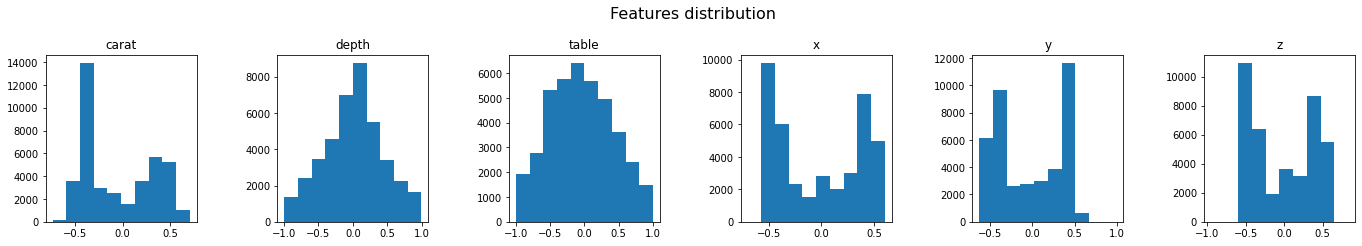

In [57]:
f,a = plt.subplots(1, len(X_columns), figsize=(20,4))
f.tight_layout(pad=5)
f.suptitle('Features distribution\n', size=16)
for i, column in enumerate(df.columns):
    a[i].hist(df[column])
    a[i].set_title(X_columns[i])

# Predict using the LABELED data `X = data_train`

In [14]:
# train_test_split

# Predict using the UNLABELED data `X = data_test`

In [15]:
data_test = pd.read_csv('../INPUT/diamonds_test.csv')
data_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63
